In [17]:
# Take an input from user
# common details
gender = "Male"
age = 30
food_preference = "Veg"
food_cousin = "Indian"
height_cm = 164
weight_kg = 70
bmi =21

# Medical details
body_Fat = None
glucose = None
tc = None
tg = None
hdl = None
ldl  = None
tc_hdl = None
bp_dias = None
bp_sys = None
hba1c = None

# Generate conditions

In [7]:
def calculate_caloric_needs(weight, height, age, gender, activity_level, goal='Maintain', weight_change_per_week=0):
    # BMR calculation based on gender
    if gender == 'male':
        bmr = 88.362 + (13.397 * weight) + (4.799 * height) - (5.677 * age)
    else:
        bmr = 447.593 + (9.247 * weight) + (3.098 * height) - (4.330 * age)
    
    # Activity multiplier
    activity_multipliers = {
        'sedentary': 1.2,
        'lightly_active': 1.375,
        'moderately_active': 1.55,
        'very_active': 1.725,
        'super_active': 1.9
    }
    
    tdee = bmr * activity_multipliers.get(activity_level, 1.2)  # Default to sedentary if no match
    
    # Caloric adjustment for weight change goal
    calorie_adjustment = weight_change_per_week * 500  # weight_change_per_week in pounds
    
    if goal == 'Weight Loss':
        daily_calories = tdee - calorie_adjustment
    elif goal == 'Weight Gain':
        daily_calories = tdee + calorie_adjustment
    else:
        daily_calories = tdee  # Maintain weight
    
    return daily_calories

def calculate_bmi(weight_kg, height_cm):
    # Convert height from cm to meters
    height_m = height_cm / 100
    
    # Calculate BMI
    bmi = weight_kg / (height_m ** 2)
    
    return round(bmi, 2)

def weight_recommendation(bmi):
    # Define BMI categories based on standard guidelines
    bmi_categories = {
        "underweight": (0, 18.5),
        "normal": (18.5, 24.9),
        "overweight": (25, 29.9),
        "obesity": (30, 39.9),
        "severe_obesity": (40, float('inf'))
    }
    # Determine the BMI category
    if bmi <18.5:
        category = "Weight Gain"
        return category
    elif bmi < 24.9:
        category = "Maintain"
        return category
    elif bmi <29.9:
        category = "Weight Loss"
        return category
    elif bmi < 39.9:
        category = "Weight Loss"
        return category
    else:
        category = "Weight Loss"
    
    return category

def evaluate_diabetes(glucose, hba1c, age, gender):
    # Evaluate fasting glucose levels
    if glucose < 100:
        glucose_status = 'Normal'
    elif 100 <= glucose < 126:
        glucose_status = 'Prediabetes'
    else:
        glucose_status = 'Diabetes'
    
    # Evaluate HbA1c levels
    if hba1c < 5.7:
        hba1c_status = 'Normal'
    elif 5.7 <= hba1c < 6.5:
        hba1c_status = 'Prediabetes'
    else:
        hba1c_status = 'Diabetes'
    
    # Determine overall diabetes status
    if glucose_status == 'Diabetes' or hba1c_status == 'Diabetes':
        diabetes_status = 'Diabetes'
    elif glucose_status == 'Prediabetes' or hba1c_status == 'Prediabetes':
        diabetes_status = 'Prediabetes'
    else:
        diabetes_status = 'Normal'
    
    # Add context for age and gender
    age_risk = ""
    gender_risk = ""

    # Age-related risk
    if age >= 45:
        age_risk = "Increased age-related risk for Type 2 Diabetes"
    else:
        age_risk = "Lower age-related risk for Type 2 Diabetes"

    # Gender-related risk
    if gender == 'male':
        gender_risk = "Men may develop diabetes at lower BMI"
    else:
        gender_risk = "Women might have hormone-related risk factors (e.g., gestational diabetes)"

    return {
        'Glucose Status': glucose_status,
        'HbA1c Status': hba1c_status,
        'Diabetes Status': diabetes_status,
        'Age Risk': age_risk,
        'Gender Risk': gender_risk
    }

def is_cholesterol_normal(tc, ldl, hdl, tg, tc_hdl_ratio, gender):
    # Total Cholesterol (Tc) Normal Range
    if not (tc < 200):
        return "Abnormal"
    
    # Low-Density Lipoprotein (LDL) Normal Range
    if not (ldl < 100):
        return "Abnormal"
    
    # High-Density Lipoprotein (HDL) Normal Range
    if gender == 'male':
        if not (hdl >= 40):
            return "Abnormal"
    elif gender == 'female':
        if not (hdl >= 50):
            return "Abnormal"
    
    # Triglycerides (Tg) Normal Range
    if not (tg < 150):
        return "Abnormal"
    
    # Total Cholesterol/HDL Ratio (Tc/Hdl) Normal Range
    if not (tc_hdl_ratio < 4):
        return "Abnormal"
    
    return "Normal"


In [2]:
# diabetes_status = evaluate_diabetes(glucose, hba1c, age, gender)
# cholesterol_status = is_cholesterol_normal(tc, ldl, hdl, tg, tc_hdl, gender)

# bmi = calculate_bmi(weight_kg, height_cm)
# diet_recommendation = weight_recommendation(age, gender, height_cm, bmi)



# activity_level = 'moderately_active'

# if diet_recommendation == "Weight Loss":
#     weight_change_per_week = 1 # pounds
# elif diet_recommendation == "Weight Gain":
#     weight_change_per_week = 0.5
# else:
#     weight_change_per_week =0

# daily_calories_needed = calculate_caloric_needs(weight_kg, height_cm, age, gender, activity_level, diet_recommendation, weight_change_per_week)
# print(f"Daily calories needed: {daily_calories_needed}")


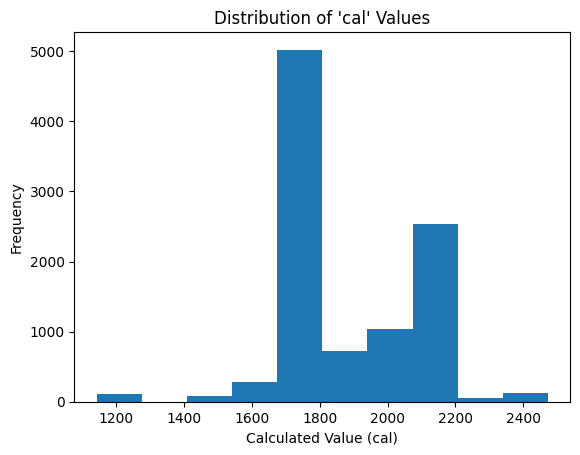

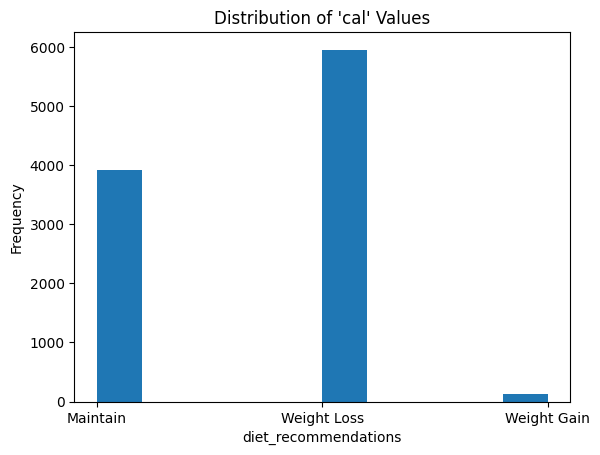

In [12]:
import csv
import matplotlib.pyplot as plt

gender = "Male"
age = 70
food_preference = "Veg"
food_cousin = "Indian"
# height_cm = 164
# weight_kg = 25

def main(gender, age, bmi, body_fat, glucose, height_cm, weight_kg, tc, tg, hdl, ldl, tc_hdl, bp_dias, bp_sys, hba1c):
  
    
    diabetes_status = evaluate_diabetes(glucose, hba1c, age, gender)
    cholesterol_status = is_cholesterol_normal(tc, ldl, hdl, tg, tc_hdl, gender)

    # bmi = calculate_bmi(weight_kg, height_cm)
    diet_recommendation = weight_recommendation(bmi)



    activity_level = 'moderately_active'

    if diet_recommendation == "Weight Loss":
        weight_change_per_week = 0.7 # pounds
    elif diet_recommendation == "Weight Gain":
        weight_change_per_week = 0.5
    else:
        weight_change_per_week =0

    daily_calories_needed = calculate_caloric_needs(weight_kg, height_cm, age, gender, activity_level, diet_recommendation, weight_change_per_week)
    # print(f"Daily calories needed: {daily_calories_needed}")

    return daily_calories_needed, diet_recommendation,diabetes_status,cholesterol_status

# Specify the path to your CSV file
csv_file_path = "E:\SenzMate\Diet-Plan\Diet Recommendation\Diet Recommendation\query_dataset_dump.csv"

# Open the CSV file in read mode
with open(csv_file_path, 'r') as csvfile:
    reader = csv.DictReader(csvfile)

    # Skip the header row if it exists
    # next(reader, None)  # Assuming the header row is present

    cal_values =[]
    diet_recommendations = []
    # Read each row and extract values
    for row in reader:
        bmi = float(row['ï»¿bmi'])
        body_fat = float(row['body_fat'])
        glucose = float(row['glucose'])
        height = float(row['height'])
        weight = float(row['weight'])
        tc = float(row['tc'])
        tg = float(row['tg'])
        hdl = float(row['hdl'])
        ldl = float(row['ldl'])
        tc_hdl = float(row['tc_hdl'])
        bp_dias = float(row['bp_dias'])
        bp_sys = float(row['bp_sys'])
        hba1c = float(row['hba1c'])

        # Call the main function with the extracted values
        cal ,diet_recommendation,diabetes_status,cholesterol_status = main(gender, age, bmi, body_fat, glucose, height, weight, tc, tg, hdl, ldl, tc_hdl, bp_dias, bp_sys, hba1c)
    # Append the calculated 'cal' value to the list
        cal_values.append(cal)
        diet_recommendations.append(diet_recommendation)

    # Plot the distribution of 'cal' values (assuming they are numerical)
    plt.hist(cal_values)
    plt.xlabel("Calculated Value (cal)")
    plt.ylabel("Frequency")
    plt.title("Distribution of 'cal' Values")
    plt.show()

    plt.hist(diet_recommendations)
    plt.xlabel("diet_recommendations")
    plt.ylabel("Frequency")
    plt.title("Distribution of 'cal' Values")
    plt.show()

# cyber text generation

In [ ]:
# generate a cyber text with conditions for KG data retrival.


# KG data retrival

In [ ]:
# 

# RAG LLM